In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [59]:
path = '~/dataset/linear-regression.csv'
df = pd.read_csv(path)
x = df.drop('quality', axis=1)
y = df['quality']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.5, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.4, random_state=42)

In [60]:
# Normalize data
def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    normalized_X = (X - mean) / std
    return normalized_X, mean, std

x_train_normalized, mean_train, std_train = normalize_data(x_train)
x_validation_normalized = (x_validation - mean_train) / std_train
x_test_normalized = (x_test - mean_train) / std_train

In [61]:
# Add bias term
x_train_normalized = np.c_[np.ones(x_train_normalized.shape[0]), x_train_normalized]
x_validation_normalized = np.c_[np.ones(x_validation_normalized.shape[0]), x_validation_normalized]
x_test_normalized = np.c_[np.ones(x_test_normalized.shape[0]), x_test_normalized]

In [62]:
# Analytical solution
theta_analytical = np.linalg.inv(x_train_normalized.T @ x_train_normalized) @ x_train_normalized.T @ y_train
y_pred = x_test_normalized @ theta_analytical

# R-squared and RMSE for analytical solution
def calculate_rsq(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    rsq = 1 - (ss_residual / ss_total)
    return rsq

rsq_analytical = calculate_rsq(y_test,y_pred)
rmse_analytical = np.sqrt(np.mean((y_test - y_pred)**2))

print("Analytical Solution:")
print("R-squared:", rsq_analytical)
print("RMSE:", rmse_analytical)

Analytical Solution:
R-squared: 0.39678050845571555
RMSE: 0.6657115962476502


In [63]:
# Gradient Descent Iterative Solution
def gradient_descent(x, y, theta, learning_rate, num_iterations):
    m = len(y)
    loss_history_train = []
    loss_history_validation = []
    
    for i in range(num_iterations):
        y_pred = x @ theta
        error = y_pred - y
        gradient = (x.T @ error) / m
        theta -= learning_rate * gradient
        mse_train = np.mean(error ** 2)
        loss_history_train.append(mse_train)
        
        # Calculate loss for the validation set
        y_pred_validation = x_validation_normalized @ theta
        error_validation = y_pred_validation - y_validation
        mse_validation = np.mean(error_validation ** 2)
        loss_history_validation.append(mse_validation)
    
    return theta, loss_history_train, loss_history_validation

In [64]:
def gradient_descent_plot(learning_rate, num_iterations):
    theta_initial = np.random.rand(x_train_normalized.shape[1])
    theta_final, loss_history_train, loss_history_validation = gradient_descent(x_train_normalized, y_train, theta_initial, learning_rate, num_iterations)
    
    # Make predictions on the test set
    y_pred_gradient = x_test_normalized @ theta_final
    
    # Plot Loss function for the training set and validation set
    plt.plot(range(num_iterations), loss_history_train, label='Train')
    plt.plot(range(num_iterations), loss_history_validation, label='Validation')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Loss Function (Learning Rate = {learning_rate})')
    plt.legend()
    plt.show()
    
    # Calculate R-squared and RMSE for gradient descent solution
    rsq_gradient = calculate_rsq(y_test, y_pred_gradient)
    rmse_gradient = np.sqrt(np.mean((y_test - y_pred_gradient)**2))
    
    print(f"Gradient Descent Solution (Learning Rate = {learning_rate}):")
    print("R-squared:", rsq_gradient)
    print("RMSE:", rmse_gradient)

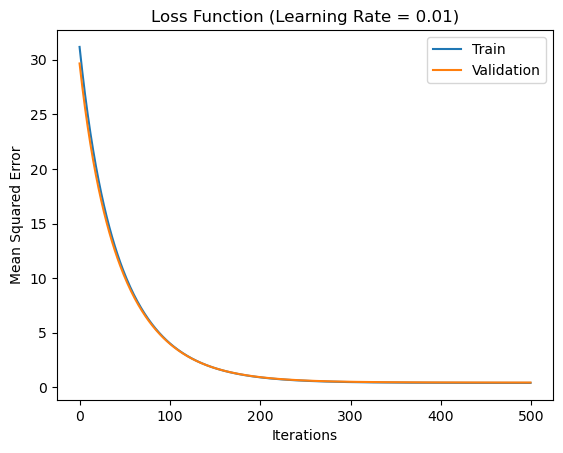

Gradient Descent Solution (Learning Rate = 0.01):
R-squared: 0.3900187402738704
RMSE: 0.669432334076269


In [65]:
gradient_descent_plot(0.01,500)

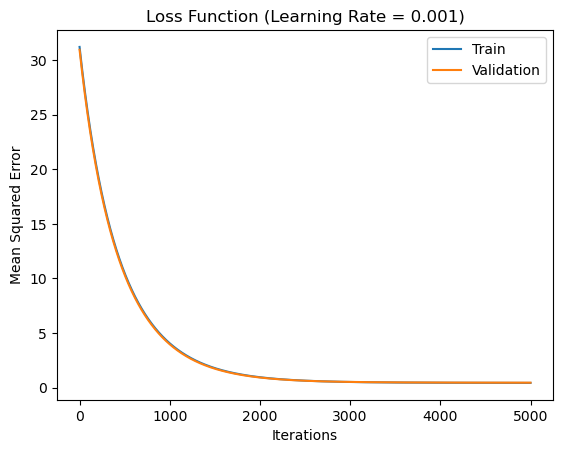

Gradient Descent Solution (Learning Rate = 0.001):
R-squared: 0.34236568666222045
RMSE: 0.6950894096231497


In [66]:
gradient_descent_plot(0.001,5000)

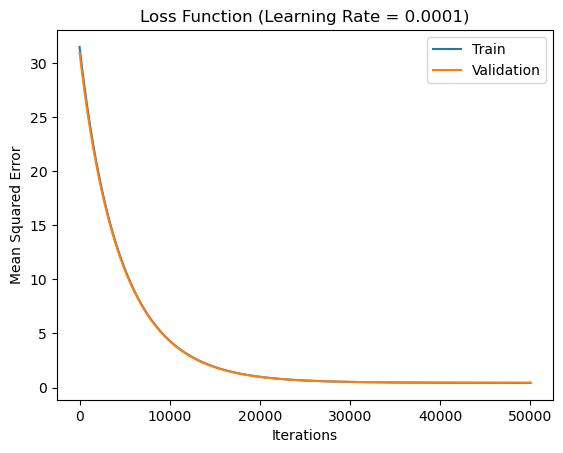

Gradient Descent Solution (Learning Rate = 0.0001):
R-squared: 0.3585052823272421
RMSE: 0.6865070180219224


In [67]:
gradient_descent_plot(0.0001,50000)

In [68]:
# Plots Loss function comparing with respect to learning rates for Testing and Validation Set
def gradient_descent_plot_lr(num_iterations):
    theta_final1, loss_history_train1, loss_history_validation1 = gradient_descent(x_train_normalized, y_train, np.random.rand(x_train_normalized.shape[1]), 0.01, num_iterations)
    theta_final2, loss_history_train2, loss_history_validation2 = gradient_descent(x_train_normalized, y_train, np.random.rand(x_train_normalized.shape[1]), 0.001, num_iterations)
    theta_final3, loss_history_train3, loss_history_validation3 = gradient_descent(x_train_normalized, y_train, np.random.rand(x_train_normalized.shape[1]), 0.0001, num_iterations)
    
    # Plot Loss function for the training set
    plt.plot(range(num_iterations), loss_history_train1, label='Learning rate 0.01')
    plt.plot(range(num_iterations), loss_history_train2, label='Learning rate 0.001')
    plt.plot(range(num_iterations), loss_history_train3, label='Learning rate 0.0001')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Loss Function Testing Set (Number of iterations = {num_iterations})')
    plt.legend()
    plt.show()
    
    # Plot Loss function for the validation set
    plt.plot(range(num_iterations), loss_history_validation1, label='Learning rate 0.01')
    plt.plot(range(num_iterations), loss_history_validation2, label='Learning rate 0.001')
    plt.plot(range(num_iterations), loss_history_validation3, label='Learning rate 0.0001')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Loss Function Validation Set (Number of iterations = {num_iterations})')
    plt.legend()
    plt.show()

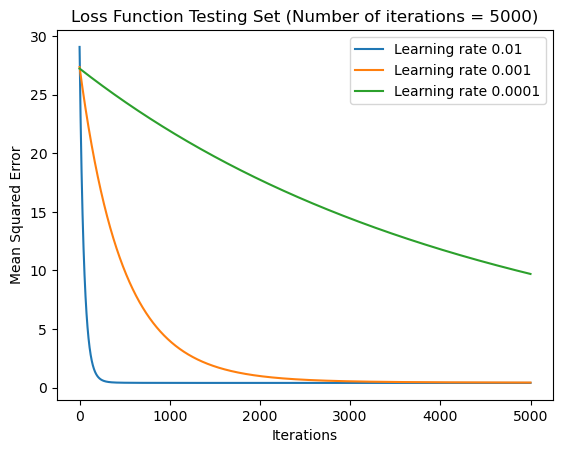

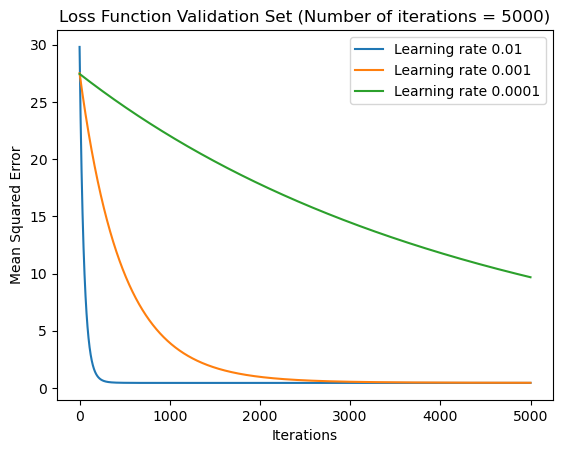

In [69]:
gradient_descent_plot_lr(5000)